## Homework 5
Xiaotong Cui

xiaotongcui@uchicago.edu

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
1

1

In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import lucem_illud

#All these packages need to be installed from pip
#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-gyxa8der
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-gyxa8der
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━

## <font color="red">*Exercise 1*</font> :)

<font color="red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the [MTurk slides on Canvas](https://canvas.uchicago.edu/courses/54694/files/folder/unfiled?preview=10675152), or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

Here me and my two other friends we each take 10 samples to label whether we think this dater's profile is attractive. And here is our data:

In [ ]:
import pandas as pd

In [ ]:
df_l = pd.read_excel('../data/dateappdata/Attractiveness.xlsx')
df_l.dropna
df_l = df_l[df_l['Attractiveness'].notna()]
df_l.reset_index(drop=True, inplace=True)
df_l= df_l.iloc[:27, :]

In [ ]:
df_l.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Good At,Physical Appearance,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column,Attractiveness
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...,1.0
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...,1.0
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te...",0.0
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,i work in a library and go to school. . .\#rea...,0.0
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,hey how's it going? currently vague on the pro...,0.0


In [ ]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd

# 假设 df_l 是包含所有数据的 DataFrame，其中 Attractiveness 是标签列
# 每个朋友的标签数据

# 计算Cohen's Kappa
kappa_score = cohen_kappa_score(friend1_labels, friend2_labels)
print(f"Cohen's Kappa Score between Friend 1 and Friend 2: {kappa_score}")

kappa_score = cohen_kappa_score(friend1_labels, friend3_labels)
print(f"Cohen's Kappa Score between Friend 1 and Friend 3: {kappa_score}")

kappa_score = cohen_kappa_score(friend2_labels, friend3_labels)
print(f"Cohen's Kappa Score between Friend 2 and Friend 3: {kappa_score}")



Cohen's Kappa Score between Friend 1 and Friend 2: -0.09756097560975618
Cohen's Kappa Score between Friend 1 and Friend 3: -0.2857142857142856
Cohen's Kappa Score between Friend 2 and Friend 3: 0.3076923076923076


Well...... It seems very inconsistent. Now lets look at other statistics.

In [ ]:
print(friend3_labels)
print(friend2_labels)
print(friend1_labels)

18    1.0
19    0.0
20    0.0
21    1.0
22    1.0
23    0.0
24    1.0
25    1.0
26    1.0
Name: Attractiveness, dtype: float64
9     1.0
10    0.0
11    1.0
12    0.0
13    1.0
14    0.0
15    1.0
16    0.0
17    1.0
Name: Attractiveness, dtype: float64
0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    0.0
8    0.0
Name: Attractiveness, dtype: float64


In [ ]:
friend1_labels = df_l.loc[:8, 'Attractiveness'].fillna(0).round().astype('int').tolist()
friend2_labels = df_l.loc[9:17, 'Attractiveness'].fillna(0).round().astype('int').tolist()
friend3_labels = df_l.loc[18:27, 'Attractiveness'].fillna(0).round().astype('int').tolist()

# 将标签数据组合成列表
label_data_list = [friend1_labels, friend2_labels, friend3_labels]


In [ ]:
anno = AnnotationsContainer.from_array(label_data_list, missing_values=[-1])

In [ ]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.44444444, 0.55555556, 0.        , 0.        ])

[[0. 0. 0. 0.]
 [2. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


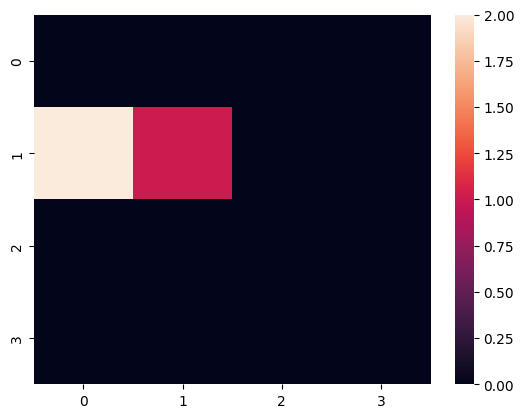

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [ ]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

-0.5000000000000001

In [ ]:
fleiss_kappa(anno.annotations[::])

0.1668649291662161

In [ ]:
krippendorffs_alpha(anno.annotations[::])

-0.047222222222222276

In [ ]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.0

In [ ]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[ nan  0.   0.   0.   0.   0.   nan  0.   0. ]
 [ 0.   1.  -0.5 -0.5 -0.8  1.   0.  -0.5 -0.8]
 [ 0.  -0.5  1.  -0.5  0.4 -0.5  0.  -0.5  0.4]
 [ 0.  -0.5 -0.5  1.   0.4 -0.5  0.   1.   0.4]
 [ 0.  -0.8  0.4  0.4  1.  -0.8  0.   0.4  1. ]
 [ 0.   1.  -0.5 -0.5 -0.8  1.   0.  -0.5 -0.8]
 [ nan  0.   0.   0.   0.   0.   nan  0.   0. ]
 [ 0.  -0.5 -0.5  1.   0.4 -0.5  0.   1.   0.4]
 [ 0.  -0.8  0.4  0.4  1.  -0.8  0.   0.4  1. ]]


/usr/local/lib/python3.10/dist-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


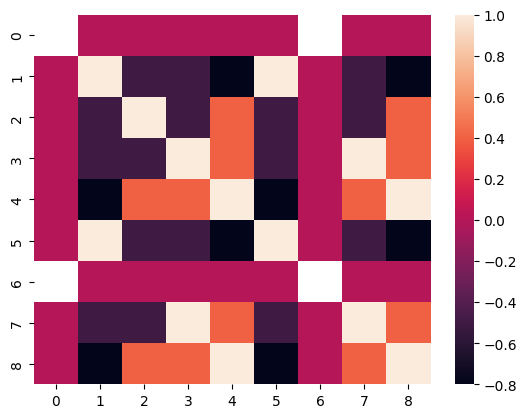

In [ ]:
ax = seaborn.heatmap(m)
plt.show()

In [ ]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)

pairwise_metric_average(cohens_kappa, anno.annotations)

-0.051428571428571414

Here we can see that the consistency among our three is super low. It make sense because attractiveness itself has very subjective meanings.

In our research use human label data is definitely not a good idea.

As a result, in later excersise we will not use the data we create here. It will definitely bring a mess!

## <font color="red">*Exercise 2*</font> :)

<font color="red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<font color="red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [ ]:
def random(numPerCategory = 500):
    datDict = {
        'vect' : [np.random.rand(2) * 2 - 1 for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def andSplit(noise = 0, numPerCategory = 500):
    def genPoint(cat):
        y = np.random.random_sample() * 2 - 1
        if noise >= 0:
            x = np.random.random_sample() - cat - (np.random.random_sample() - cat) * noise
        else:
            x = (1 - noise * np.random.random_sample()) - cat
        return np.array([x, y])
    datDict = {
        'vect' : [genPoint(i % 2) for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def xorSplit(noise = 0, numPerCategory = 500):
    def genPoint(cat):
        if cat == 1:
            if np.random.randint(0,2) < 1:
                y = np.random.random_sample() - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - np.random.random_sample() * noise * 2
            else:
                y = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
        else:
            if np.random.randint(0,2) < 1:
                y = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - np.random.random_sample() * noise * 2
            else:
                y = np.random.random_sample() - np.random.random_sample() * noise * 2
                x = np.random.random_sample() - 1 - np.random.random_sample() * noise * 2
        return np.array([x, y])

    datDict = {
        'vect' : [genPoint(i % 2) for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def targetSplit(noise = 0, numPerCategory = 500, innerRad = .3):
    def genPoint(cat):
        if cat == 0:
            r = np.random.random_sample() * innerRad + (1 - innerRad) * np.random.random_sample() * noise
        else:
            r = np.random.random_sample() * (1 - innerRad) + innerRad - innerRad * np.random.random_sample() * noise
        eta = 10 * np.pi * np.random.random_sample()
        return np.array([r * np.cos(eta), r * np.sin(eta)])

    datDict = {
        'vect' : [genPoint(i % 10) for i in range(10 * numPerCategory)],
        'category' : [i % 10 for i in range(10 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)

def multiBlobs(noise = 0, numPerCategory = 500, centers = 5):
    if isinstance(centers, int):
        n_samples = numPerCategory * centers
    else:
        n_samples = numPerCategory * len(centers)
    X, y = sklearn.datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std = (.8 * (noise * 2 + 1)))
    datDict = {
        'vect' : list(X),
        'category' : y,
    }
    return pandas.DataFrame(datDict)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs, make_moons

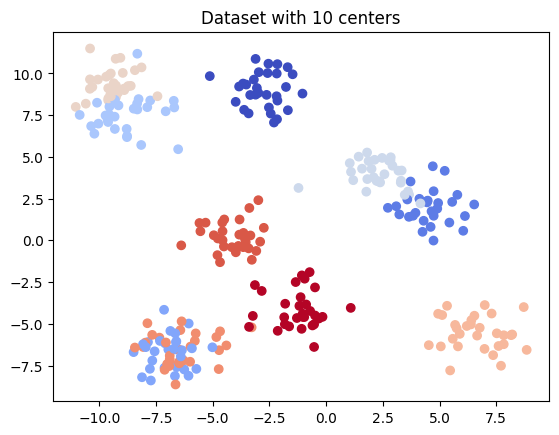

In [ ]:
# 生成并可视化数据集的函数
def generate_and_visualize_datasets(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o')
    plt.title(title)
    plt.show()

# 生成数据集
dataset = make_blobs(n_samples=300, centers=10, cluster_std=1.0, random_state=42)

# 拆分数据集
X, y = dataset

# 可视化数据集
generate_and_visualize_datasets(X, y, "Dataset with 10 centers")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier  # Add this import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the results
for name, metrics in results.items():
    print(f'{name}:\nAccuracy - {metrics["Accuracy"]:.4f}\nPrecision - {metrics["Precision"]:.4f}\nRecall - {metrics["Recall"]:.4f}\nF1 Score - {metrics["F1 Score"]:.4f}\n')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy - 0.8667
Precision - 0.8835
Recall - 0.8667
F1 Score - 0.8688

Decision Tree:
Accuracy - 0.8667
Precision - 0.8918
Recall - 0.8667
F1 Score - 0.8638

Random Forest:
Accuracy - 0.9000
Precision - 0.9413
Recall - 0.9000
F1 Score - 0.8983

KNN:
Accuracy - 0.8667
Precision - 0.8839
Recall - 0.8667
F1 Score - 0.8679

Neural Network:
Accuracy - 0.8500
Precision - 0.8611
Recall - 0.8500
F1 Score - 0.8476



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Works the best. I guess it is because our generated data has discrete labels. And random forest use multiple decision trees basicially.

Ensemble Learning: Random Forest is an ensemble learning method that improves overall performance by combining predictions from multiple weak classifiers (decision trees). By averaging or voting on the predictions of multiple models, Random Forest can reduce the risk of overfitting of individual models and enhance generalization.

Stability of Decision Trees: Random Forest uses decision trees as the basic classifiers, and decision trees perform well in capturing non-linear relationships and handling complex features in the data. By combining multiple decision trees, Random Forest can better capture complex relationships within the data.

In [ ]:
# Fantastic! Now we use the real data to implement
dfTrain3, dfTest3 = sklearn.model_selection.train_test_split(lucem_illud.loadNewsGroups(), test_size=.2)
dfTrain4, dfTest4 = sklearn.model_selection.train_test_split(lucem_illud.loadSenateSmall(), test_size=.2)
dfTrain5, dfTest5 = sklearn.model_selection.train_test_split(lucem_illud.loadSenateLarge(), test_size=.2)
dfTrain6, dfTest6 = sklearn.model_selection.train_test_split(lucem_illud.loadSpam(), test_size=.2)

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
#Classical Regression
clf1 = sklearn.linear_model.LogisticRegression()

#Bayes
#clf2 = sklearn.GaussianNB()

#Analogizes
clf3 = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
clf4 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf5 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Symbolists
clf6 = sklearn.tree.DecisionTreeClassifier()
clf7 = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf8 = sklearn.neural_network.MLPClassifier()

#Ensemble
clf9 = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
clf1.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf3.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf4.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf5.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf6.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf7.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf8.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf9.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])

GradientBoostingClassifier()

In [ ]:
lucem_illud.evaluateClassifier(clf1, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.059574,0.912077,0.923077,0.825404,0.850394
rec.autos,0.068085,0.929194,0.825758,0.781925,0.923729
misc.forsale,0.057447,0.910141,0.904762,0.803602,0.848214
comp.windows.x,0.044681,0.943370,0.896552,0.844294,0.920354


In [ ]:
lucem_illud.evaluateClassifier(clf3, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.053191,0.923888,0.925000,0.842507,0.874016
rec.autos,0.068085,0.929194,0.825758,0.781925,0.923729
misc.forsale,0.070213,0.895625,0.869159,0.762138,0.830357
comp.windows.x,0.029787,0.956198,0.945946,0.895998,0.929204


In [ ]:
lucem_illud.evaluateClassifier(clf4, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.119149,0.794403,0.927711,0.668853,0.606299
rec.autos,0.157447,0.886436,0.618280,0.608944,0.974576
misc.forsale,0.100000,0.854599,0.803738,0.672475,0.767857
comp.windows.x,0.057447,0.892628,0.957447,0.811504,0.796460


In [ ]:
lucem_illud.evaluateClassifier(clf6, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.157447,0.783040,0.734513,0.573653,0.653543
rec.autos,0.151064,0.825910,0.671533,0.578887,0.779661
misc.forsale,0.144681,0.797661,0.700000,0.555718,0.687500
comp.windows.x,0.095745,0.864394,0.809091,0.688312,0.787611


In [ ]:
lucem_illud.evaluateClassifier(clf7, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.070213,0.887434,0.935185,0.799049,0.795276
rec.autos,0.102128,0.898016,0.746479,0.696098,0.898305
misc.forsale,0.076596,0.885300,0.858491,0.742204,0.812500
comp.windows.x,0.057447,0.922870,0.877193,0.803937,0.884956


In [ ]:
lucem_illud.evaluateClassifier(clf8, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.065957,0.910183,0.893443,0.805111,0.858268
rec.autos,0.053191,0.947588,0.854962,0.824255,0.949153
misc.forsale,0.070213,0.892558,0.876190,0.762281,0.821429
comp.windows.x,0.031915,0.954798,0.937500,0.888150,0.929204


In [ ]:
lucem_illud.evaluateClassifier(clf9, dfTest3)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.093617,0.857679,0.847619,0.704345,0.760684
comp.sys.mac.hardware,0.080851,0.879297,0.836538,0.718559,0.805556
rec.autos,0.108511,0.879279,0.760870,0.687821,0.853659
comp.windows.x,0.070213,0.910001,0.861789,0.782810,0.868852


Here we can see that clf1 clf3 works better. As for the reason, it may be linear reletionship is closer to the reality.

In [ ]:
clf1.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf3.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf4.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf5.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf6.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf7.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf8.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf9.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])

GradientBoostingClassifier()

In [ ]:
lucem_illud.evaluateClassifier(clf1, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.026316,0.970199,0.955,0.955000,1.000000
Obama,0.026316,0.970199,1.000,0.966713,0.940397


In [ ]:
lucem_illud.evaluateClassifier(clf3, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.002924,0.996689,0.994792,0.994792,1.000000
Obama,0.002924,0.996689,1.000000,0.996301,0.993377


In [ ]:
lucem_illud.evaluateClassifier(clf4, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.157895,0.825353,0.793991,0.786593,0.968586
Obama,0.157895,0.825353,0.944954,0.784922,0.682119


In [ ]:
lucem_illud.evaluateClassifier(clf6, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.005848,0.994071,0.994764,0.992480,0.994764
Obama,0.005848,0.994071,0.993377,0.989723,0.993377


In [ ]:
lucem_illud.evaluateClassifier(clf7, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.002924,0.997382,1.000000,0.997688,0.994764
Obama,0.002924,0.997382,0.993421,0.993421,1.000000


In [ ]:
lucem_illud.evaluateClassifier(clf8, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.04386,0.954492,0.953608,0.941196,0.968586
Obama,0.04386,0.954492,0.959459,0.928589,0.940397


In [ ]:
lucem_illud.evaluateClassifier(clf9, dfTest4)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Clinton,0.011696,0.98773,0.990385,0.98671,0.990385
Obama,0.011696,0.98773,0.985075,0.97622,0.985075


Here most of the models done a good job! However for clf4 which is the svm poly 3. It sucks. I guess it is because it over fits the model.

In [ ]:
clf1.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf3.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf4.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf5.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf6.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf7.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf8.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf9.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])

GradientBoostingClassifier()

In [ ]:
lucem_illud.evaluateClassifier(clf1, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.016645,0.930108,1.000000,0.876860,0.860215
Kennedy,0.049936,0.952642,0.915567,0.906426,0.980226
Kohl,0.008963,0.957628,0.985075,0.910668,0.916667
Klobuchar,0.006402,0.967105,1.000000,0.940613,0.934211
Kerry,0.030730,0.955810,0.940217,0.891149,0.930108


In [ ]:
lucem_illud.evaluateClassifier(clf3, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.006402,0.973118,1.000000,0.952639,0.946237
Kennedy,0.026889,0.973720,0.961219,0.951175,0.980226
Kohl,0.003841,0.985406,0.985915,0.961090,0.972222
Klobuchar,0.001280,0.993421,1.000000,0.988123,0.986842
Kerry,0.023047,0.968243,0.951613,0.917091,0.951613


In [ ]:
lucem_illud.evaluateClassifier(clf4, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.060179,0.747312,1.000000,0.554803,0.494624
Kennedy,0.252241,0.767631,0.646182,0.642368,0.980226
Kohl,0.048656,0.736111,1.000000,0.520878,0.472222
Klobuchar,0.040973,0.795343,0.978261,0.618926,0.592105
Kerry,0.128041,0.760748,0.864407,0.581584,0.548387


In [ ]:
lucem_illud.evaluateClassifier(clf6, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.001280,0.994624,1.000000,0.990528,0.989247
Kennedy,0.008963,0.990837,0.991501,0.985420,0.988701
Kohl,0.002561,0.998590,0.972973,0.972973,1.000000
Klobuchar,0.003841,0.992003,0.974026,0.962490,0.986842
Kerry,0.001280,0.997312,1.000000,0.995904,0.994624


In [ ]:
lucem_illud.evaluateClassifier(clf7, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.005122,0.995075,0.991573,0.990052,0.997175
Kohl,0.000000,1.000000,1.000000,1.000000,1.000000
Klobuchar,0.001280,0.993421,1.000000,0.988123,0.986842
Kerry,0.003841,0.993783,0.994595,0.986461,0.989247


In [ ]:
lucem_illud.evaluateClassifier(clf8, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.011524,0.956263,0.988372,0.913594,0.913978
Kennedy,0.040973,0.959873,0.942308,0.927111,0.968927
Kohl,0.006402,0.971517,0.985507,0.935878,0.944444
Klobuchar,0.003841,0.986133,0.986667,0.963263,0.973684
Kerry,0.039693,0.946232,0.914439,0.859900,0.919355


In [ ]:
lucem_illud.evaluateClassifier(clf9, dfTest5)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kyl,0.001280,0.994624,1.000000,0.990528,0.989247
Kennedy,0.003841,0.996246,0.994366,0.992838,0.997175
Kohl,0.000000,1.000000,1.000000,1.000000,1.000000
Klobuchar,0.001280,0.999291,0.987013,0.987013,1.000000
Kerry,0.001280,0.997312,1.000000,0.995904,0.994624


Here most of the models done a good job! However for clf4 which is the svm poly 3. It sucks. I guess it is because it over fits the model.

In [ ]:
clf1.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf3.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf4.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf5.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf6.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf7.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf8.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf9.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])

GradientBoostingClassifier()

In [ ]:
lucem_illud.evaluateClassifier(clf1, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.115328,0.634649,0.966667,0.375862,0.271028
not spam,0.115328,0.634649,0.880916,0.880852,0.998270


In [ ]:
lucem_illud.evaluateClassifier(clf3, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.081752,0.757357,0.918033,0.554918,0.523364
not spam,0.081752,0.757357,0.918269,0.917625,0.991349


In [ ]:
lucem_illud.evaluateClassifier(clf4, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.084672,0.736588,0.962264,0.540401,0.476636
not spam,0.084672,0.736588,0.911392,0.911159,0.996540


In [ ]:
lucem_illud.evaluateClassifier(clf6, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.074453,0.826416,0.811111,0.603010,0.682243
not spam,0.074453,0.826416,0.942857,0.939944,0.970588


In [ ]:
lucem_illud.evaluateClassifier(clf7, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.070073,0.806164,0.893333,0.617771,0.626168
not spam,0.070073,0.806164,0.934426,0.933172,0.986159


In [ ]:
lucem_illud.evaluateClassifier(clf8, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.072993,0.815857,0.843373,0.605754,0.654206
not spam,0.072993,0.815857,0.938538,0.936407,0.977509


In [ ]:
lucem_illud.evaluateClassifier(clf9, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.116788,0.637592,0.909091,0.367294,0.280374
not spam,0.116788,0.637592,0.881902,0.881704,0.994810


Here clf4 done a good job! The level 3 polynomial capture more imformation.

Now here comes the stretch part!

We are going to use Adaboost!

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  # 分类问题
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=1)
clf9 = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0)

In [ ]:
clf9.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results['AdaBoost'] = {
  'Accuracy': accuracy,
  'Precision': precision,
  'Recall': recall,
  'F1 Score': f1}

print(f"AdaBoost Results:\n"
      f"Accuracy: {results['AdaBoost']['Accuracy']}\n"
      f"Precision: {results['AdaBoost']['Precision']}\n"
      f"Recall: {results['AdaBoost']['Recall']}\n"
      f"F1 Score: {results['AdaBoost']['F1 Score']}")

AdaBoost Results:
Accuracy: 0.85
Precision: 0.861111111111111
Recall: 0.85
F1 Score: 0.8476318126318126


Well it is reletively the same as other models for my artificial data. I guess it is because it is artificial so its simple.

In [ ]:
# Now we use Email Spam to use AdaBoost
clf9.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [ ]:
lucem_illud.evaluateClassifier(clf9, dfTest6)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
spam,0.09635,0.725859,0.847458,0.479220,0.467290
not spam,0.09635,0.725859,0.908946,0.907931,0.984429


It is worse than other models.
It is worth noting that Adaboost is sensitive to noisy data and outliers, so some preprocessing or the use of more robust weak classifiers may be necessary in practical applications.

## <font color="red">*Exercise 3*</font> :)

<font color="red">In the cells immediately following, perform logistic regression classification using training, testing and uncoded (i.e., data you didn't code by hand but want to use your model on) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk in Exercise 1). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [ ]:
# Finaly its time to perform machine learning models
# Before we do that lets do some data preparation part
# First we import the data
import pandas as pd

df = pd.read_excel('../data/dateappdata/merged_okcupid_profiles.xlsx')
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Occupation Intro,Good At,Physical Appearance,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,i work in a library and go to school. . .\#rea...
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,hey how's it going? currently vague on the pro...


In [ ]:
# At the same time, we extract some new data from OK Cupid. This is what we called, the uncoded data.
df_new = pd.read_excel('../data/dateappdata/new_merged_okcupid_profiles.xlsx')

In [ ]:
def clean_text(text):
    if isinstance(text, float):
        text = str(text) # convert float to string
    text = text.replace('\n', ' ') # remove newline
    text = text.replace('\r', ' ') # remove carriage return
    text = text.replace('\t', ' ') # remove tab
    text = text.replace('  ', ' ') # remove double spaces
    text = text.replace('\#', ' ') # remove \#, which we used as a separator
    text = text.replace('  ', ' ') # remove double spaces
    return text

# Now we will apply the function to the "Ideal Type" column
df['Merged_Column'] = df['Merged_Column'].apply(clean_text)
df_new['Merged_Column'] = df_new['Merged_Column'].apply(clean_text)

In [ ]:
# Now we remove the NaN values
columns_to_keep = ['Merged_Column', 'age', 'sex', 'status', 'orientation','body_type', 'religion', 'smokes','drugs']
df = df.dropna(subset=columns_to_keep)

# Now we turn the df['Ideal Type'] column into a list
Merged_Column = df['Merged_Column'].tolist()
# Since our sample sise is too large, we will only use the first 1000 rows
Merged_Column = Merged_Column[:1000]
df_1000 = df[:1000]

In [ ]:
columns_to_keep = ['Merged_Column', 'age', 'sex', 'status', 'orientation','body_type', 'smokes','drugs'] #We dont have religion in the new data set.
df_new = df_new.dropna(subset=columns_to_keep)

# Now we turn the df['Ideal Type'] column into a list
Merged_Column = df_new['Merged_Column'].tolist()
# Since our sample sise is too large, we will only use the first 1000 rows
Merged_Column = Merged_Column[:100]
df_new = df_new[:100]

In [ ]:
df_1000.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Occupation Intro,Good At,Physical Appearance,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was som...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN,"writing. meeting new people, spending time wit..."
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,my names jake. i'm a creative guy and i look f...
11,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","i was born in wisconsin, grew up in iowa, and ..."


In [ ]:
# Here we need to get tokenuized words and normalized tokens
# Same as hw2 lets do it!
import spacy
nlp = spacy.load("en_core_web_sm")
ideal_type = df_1000['Merged_Column'].tolist()
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized
Merged_Column_tokenized = [word_tokenize(ideal_type) for ideal_type in ideal_type]
df_1000['Merged_Column_Tokenized'] = Merged_Column_tokenized

<ipython-input-11-c517f38de675>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['Merged_Column_Tokenized'] = Merged_Column_tokenized


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
ideal_type = df_new['Merged_Column'].tolist()
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized
Merged_Column_tokenized = [word_tokenize(ideal_type) for ideal_type in ideal_type]
df_new['Merged_Column_Tokenized'] = Merged_Column_tokenized

In [ ]:
def normalizeTokens(word_list, extra_stop=['ve']):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list])

    doc = nlp(word_list.lower())

    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

df_1000['normalized_merged_tokens'] = df_1000['Merged_Column_Tokenized'].apply(lambda x: normalizeTokens(x))

<ipython-input-13-5d9a2af4049d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['normalized_merged_tokens'] = df_1000['Merged_Column_Tokenized'].apply(lambda x: normalizeTokens(x))


In [ ]:
df_new['normalized_merged_tokens'] = df_new['Merged_Column_Tokenized'].apply(lambda x: normalizeTokens(x))

In [ ]:
df_1000.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Physical Appearance,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column,Merged_Column_Tokenized,normalized_merged_tokens
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was som...,"[about, me, i, would, love, to, think, that, i...","[love, think, kind, intellectual, dumb, smart,..."
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...,"[i, am, a, chef, this, is, what, that, means, ...","[chef, mean, workaholic, love, cook, regardles..."
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,i'm rather approachable (a byproduct of being ...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN,"writing. meeting new people, spending time wit...","[writing, meeting, new, people, spending, time...","[writing, meet, new, people, spend, time, frie..."
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,my names jake. i'm a creative guy and i look f...,"[my, names, jake, i, 'm, a, creative, guy, and...","[name, jake, m, creative, guy, look, m, easy, ..."
11,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","i was born in wisconsin, grew up in iowa, and ...","[i, was, born, in, wisconsin, grew, up, in, io...","[bear, wisconsin, grow, iowa, move, california..."


In [ ]:
# Save the dataframe
df_1000.to_csv('../data/dateappdata/onelayer_normalized_merge_df_1000.csv')


In [ ]:
# Now we load them again
df_1000 = pd.read_csv('../data/dateappdata/onelayer_normalized_merge_df_1000.csv')

In [ ]:
# Now we want the merged text be a doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(df_1000['normalized_merged_tokens'])]

vector_size = 100
model = Doc2Vec(vector_size=vector_size, window=5, min_count=10, workers=4, epochs=5)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)


df_1000['doc2vec_merged_vector'] = df_1000['normalized_merged_tokens'].apply(lambda x: model.infer_vector(x))

<ipython-input-15-09bd4bd5a105>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['doc2vec_merged_vector'] = df_1000['normalized_merged_tokens'].apply(lambda x: model.infer_vector(x))


In [ ]:
df_new['doc2vec_merged_vector'] = df_new['normalized_merged_tokens'].apply(lambda x: model.infer_vector(x))

In [ ]:
df_1000.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column,Merged_Column_Tokenized,normalized_merged_tokens,doc2vec_merged_vector
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was som...,"[about, me, i, would, love, to, think, that, i...","[love, think, kind, intellectual, dumb, smart,...","[-0.017419433, 0.06892879, 0.0049163303, -0.00..."
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...,"[i, am, a, chef, this, is, what, that, means, ...","[chef, mean, workaholic, love, cook, regardles...","[-0.021443212, 0.043592155, -0.012447891, -0.0..."
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN,"writing. meeting new people, spending time wit...","[writing, meeting, new, people, spending, time...","[writing, meet, new, people, spend, time, frie...","[-0.012079862, 0.12562475, 0.016083675, 0.0149..."
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,...,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,my names jake. i'm a creative guy and i look f...,"[my, names, jake, i, 'm, a, creative, guy, and...","[name, jake, m, creative, guy, look, m, easy, ...","[-0.022472007, 0.045358814, -0.0005586672, 0.0..."
11,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","i was born in wisconsin, grew up in iowa, and ...","[i, was, born, in, wisconsin, grew, up, in, io...","[bear, wisconsin, grow, iowa, move, california...","[0.0098348735, 0.016001783, -0.006841609, -0.0..."


In [ ]:
import pandas as pd
import re

# 假设你的数据框为 df，包含 'religion' 列
df_1000['religion'] = df_1000['religion'].astype(str)


religion_mapping = {
    'catholicism': ['catholicism', 'catholicism and laughing about it', 'catholicism and not so serious about it', 'catholicism and very serious about it', 'catholicism but not too serious about it'],
    'agnosticism': ['agnosticism', 'agnosticism and laughing about it', 'agnosticism and not so serious about it', 'agnosticism and very serious about it', 'agnosticism but not too serious about it'],
    'atheism': ['atheism', 'atheism and laughing about it', 'atheism and not so serious about it', 'atheism and very serious about it', 'atheism but not too serious about it'],
    'buddhism': ['buddhism', 'buddhism and laughing about it', 'buddhism and not so serious about it', 'buddhism and very serious about it', 'buddhism but not too serious about it'],
    'hinduism': ['hinduism', 'hinduism and laughing about it', 'hinduism and not so serious about it', 'hinduism and very serious about it', 'hinduism but not too serious about it'],
    'islam': ['islam', 'islam and laughing about it', 'islam and not so serious about it', 'islam and very serious about it', 'islam but not too serious about it'],
    'judaism': ['judaism', 'judaism and laughing about it', 'judaism and not so serious about it', 'judaism and very serious about it', 'judaism but not too serious about it'],
    'other': ['other', 'other and laughing about it', 'other and not so serious about it', 'other and very serious about it', 'other but not too serious about it'],
    'christianity': ['christianity', 'christianity and laughing about it', 'christianity and not so serious about it', 'christianity and very serious about it', 'christianity but not too serious about it']


}

# 将文本进行模糊匹配并映射为主要宗教类别
def map_religion(text):
    for key, values in religion_mapping.items():
        for value in values:
            if re.search(value, text, re.IGNORECASE):
                return key
    return text

# 应用映射函数到 'religion' 列
df_1000['mapped_religion'] = df_1000['religion'].apply(map_religion)


<ipython-input-17-5662dc162d30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['religion'] = df_1000['religion'].astype(str)
<ipython-input-17-5662dc162d30>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['mapped_religion'] = df_1000['religion'].apply(map_religion)


In [ ]:
# 创建一个映射字典，将文本映射为数值
text_mapping = {
    'agnosticism': 0,
    'atheism': 1,
    'catholicism': 2,
    'buddhism': 3,
    'hinduism': 4,
    'islam': 5,
    'judaism': 6,
    'other': 7,
    'christianity': 8
}

# 使用映射字典将文本变量映射为数值
df_1000['mapped_religion'] = df_1000['mapped_religion'].map(text_mapping)

# 确保 'mapped_religion' 列的数据类型为数值型
df_1000['mapped_religion_num'] = df_1000['mapped_religion'].astype(int)


<ipython-input-18-d165b0ac873d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['mapped_religion'] = df_1000['mapped_religion'].map(text_mapping)
<ipython-input-18-d165b0ac873d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['mapped_religion_num'] = df_1000['mapped_religion'].astype(int)


In [ ]:
# Now lets deal with other variables
text_mapping = {
    'm' : 0,
    'f' : 1
}

df_1000['sex_num'] = df_1000['sex'].map(text_mapping)
df_new['sex_num'] = df_new['sex'].map(text_mapping)

text_mapping = {
    'no' : 0,
    'sometimes' : 1,
    'trying to quit' : 2,
    'when drinking' : 3,
    'yes' : 4
}

df_1000['smokes_num'] = df_1000['smokes'].map(text_mapping)
df_new['smokes_num'] = df_new['smokes'].map(text_mapping)

text_mapping = {
    'never' : 0,
    'sometimes' : 1,
    'often' : 2
}

df_1000['drugs_num'] = df_1000['drugs'].map(text_mapping)
df_new['drugs_num'] = df_new['drugs'].map(text_mapping)

text_mapping = {
    'straight' : 0,
    'bisexual' : 1,
    'gay' : 2
}

df_1000['orientation_num'] = df_1000['orientation'].map(text_mapping)
df_new['orientation_num'] = df_new['orientation'].map(text_mapping)

<ipython-input-19-70a1cba248eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['sex_num'] = df_1000['sex'].map(text_mapping)
<ipython-input-19-70a1cba248eb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['smokes_num'] = df_1000['smokes'].map(text_mapping)
<ipython-input-19-70a1cba248eb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
# Check age dtype
df_1000['age'].dtype
# 先检查 'age' 列中的数据
print(df_1000['age'].unique())

# 将 'age' 列转换为数值类型
df_1000['age'] = pd.to_numeric(df_1000['age'], errors='coerce')

# 检查转换后的 'age' 列的数据类型
print(df_1000['age'].dtype)


[22 35 31 37 28 30 29 33 27 32 38 26 25 34 21 39 46 41 42 45 23 36 55 24
 50 59 54 20 62 44 52 43 58 66 53 19 40 47 49 51 48 63 61 57 60 18 56 64
 65]
int64


<ipython-input-20-159522328d2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['age'] = pd.to_numeric(df_1000['age'], errors='coerce')


In [ ]:
df_1000.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Merged_Column,Merged_Column_Tokenized,normalized_merged_tokens,doc2vec_merged_vector,mapped_religion,mapped_religion_num,sex_num,smokes_num,drugs_num,orientation_num
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was som...,"[about, me, i, would, love, to, think, that, i...","[love, think, kind, intellectual, dumb, smart,...","[-0.017419433, 0.06892879, 0.0049163303, -0.00...",0,0,0,1,0,0
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,"[i, am, a, chef, this, is, what, that, means, ...","[chef, mean, workaholic, love, cook, regardles...","[-0.021443212, 0.043592155, -0.012447891, -0.0...",0,0,0,0,1,0
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,"writing. meeting new people, spending time wit...","[writing, meeting, new, people, spending, time...","[writing, meet, new, people, spend, time, frie...","[-0.012079862, 0.12562475, 0.016083675, 0.0149...",8,8,1,0,0,0
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,...,my names jake. i'm a creative guy and i look f...,"[my, names, jake, i, 'm, a, creative, guy, and...","[name, jake, m, creative, guy, look, m, easy, ...","[-0.022472007, 0.045358814, -0.0005586672, 0.0...",1,1,0,0,0,0
11,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,"i was born in wisconsin, grew up in iowa, and ...","[i, was, born, in, wisconsin, grew, up, in, io...","[bear, wisconsin, grow, iowa, move, california...","[0.0098348735, 0.016001783, -0.006841609, -0.0...",8,8,0,0,0,0


In [ ]:
# save it
df_1000.to_csv('../data/dateappdata/num_onelayer_normalized_merge_df_1000.csv')

In [ ]:
# 将 'doc2vec_merged_vector' 列的数组连接成一个单一数组
flattened_data = np.concatenate(df_1000['doc2vec_merged_vector'].values)

# 将数组转换为 NumPy 数组，并确保数据类型是浮点数
numeric_data = np.array(flattened_data, dtype=np.float32)

# 确保 numeric_data 的形状正确
numeric_data = numeric_data.reshape(-1, len(df_1000['doc2vec_merged_vector'].values[0]))

# 将 numeric_data 存储在新列 'numeric_doc2vec_merged_vector' 中
df_1000['numeric_doc2vec_merged_vector'] = numeric_data.tolist()


<ipython-input-21-1dffe5915fcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['numeric_doc2vec_merged_vector'] = numeric_data.tolist()


In [ ]:
# 检查 Logistic Regression 模型中使用的特征和目标变量的数据类型
print(f"Features (X) Data Types:")
for column in X.columns:
    print(f"{column}: {X[column].dtype}")

print("\nTarget Variable (y) Data Type:")
print(f"mapped_religion_num: {y.dtype}")

Features (X) Data Types:
numeric_doc2vec_merged_vector: object
sex_num: int64
smokes_num: int64
drugs_num: int64
orientation_num: int64

Target Variable (y) Data Type:
mapped_religion_num: int64


In [ ]:
# X
non_numeric_variables = ['sex_num', 'smokes_num', 'drugs_num', 'orientation_num']
# 假设 'numeric_doc2vec_merged_vector' 是包含列表的列
numeric_data = pd.DataFrame(df_1000['numeric_doc2vec_merged_vector'].tolist())
# 获取 shape
print(numeric_data.shape)

selected_columns = ['sex_num', 'smokes_num', 'drugs_num', 'orientation_num']

# 从 df_1000 中提取特定列
selected_data = df_1000[selected_columns]

numeric_data_reset = numeric_data.reset_index(drop=True)
selected_data_reset = selected_data.reset_index(drop=True)

# 使用 merge 合并
df_1000_combined = pd.merge(numeric_data_reset, selected_data_reset, left_index=True, right_index=True)


# 打印合并后的数据框
print(df_1000_combined.shape)
# 将列名都转换为字符串类型
df_1000_combined.columns = df_1000_combined.columns.astype(str)


(1000, 100)
(1000, 104)


In [ ]:
# 将列名都转换为字符串类型
df_1000_combined.columns = df_1000_combined.columns.astype(str)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_1000_combined, y, test_size=0.2, random_state=42)

# Initialize the model
model_lr = LogisticRegression()

# Train It
model_lr.fit(X_train, y_train)

# Predict It
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)


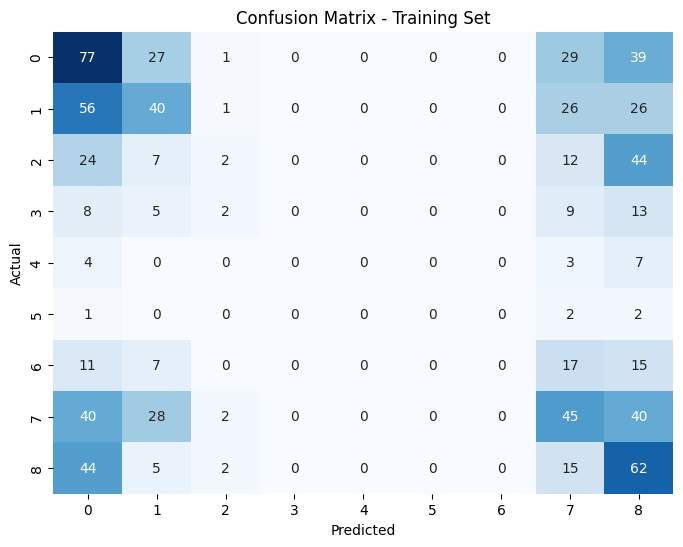

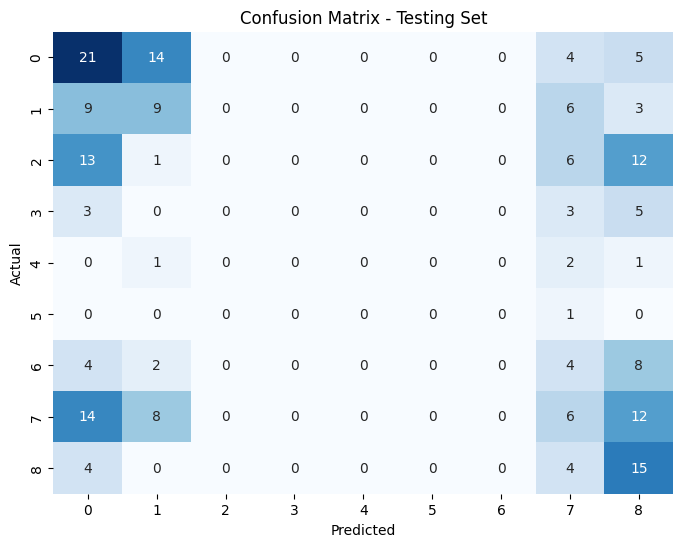

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Set Metrics:
Precision: 0.2429
Recall: 0.2825
F1 Score: 0.2446

Testing Set Metrics:
Precision: 0.1643
Recall: 0.2550
F1 Score: 0.1943


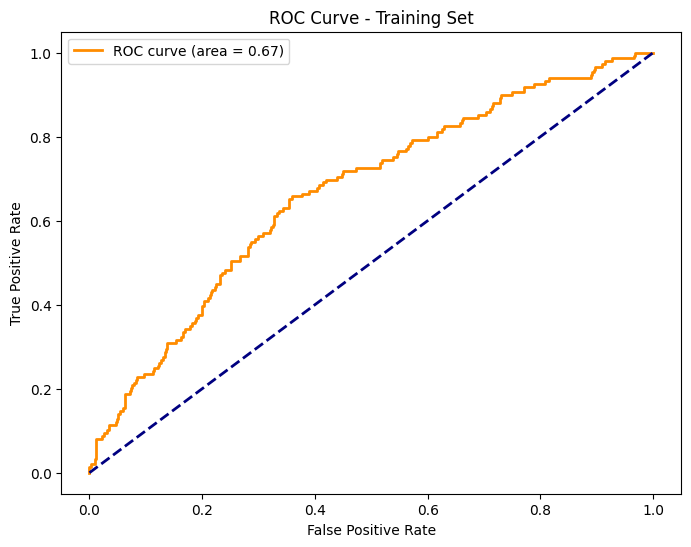

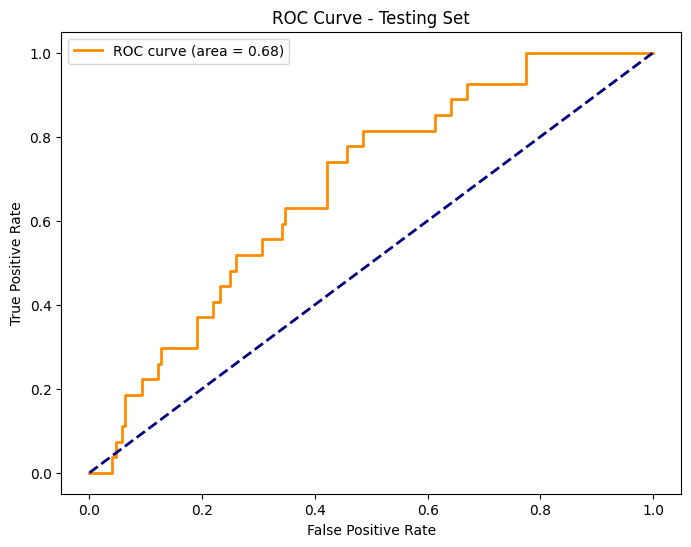

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualize
plot_confusion_matrix(y_train, y_pred_train, title='Confusion Matrix - Training Set')
plot_confusion_matrix(y_test, y_pred_test, title='Confusion Matrix - Testing Set')

# Calculate Precision Recall......
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Training Set Metrics:")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

print("\nTesting Set Metrics:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

# 计算 AUC 和绘制 ROC 曲线
def plot_roc_curve(y_true, y_prob, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# 训练集 ROC 曲线可视化
y_prob_train = model_lr.predict_proba(X_train)[:, 1]
plot_roc_curve(y_train, y_prob_train, title='ROC Curve - Training Set')

# 测试集 ROC 曲线可视化
y_prob_test = model_lr.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_test, title='ROC Curve - Testing Set')

In [ ]:
# Now lets explore the uncoded data.

# 将 'doc2vec_merged_vector' 列的数组连接成一个单一数组
flattened_data = np.concatenate(df_new['doc2vec_merged_vector'].values)

# 将数组转换为 NumPy 数组，并确保数据类型是浮点数
numeric_data = np.array(flattened_data, dtype=np.float32)

# 确保 numeric_data 的形状正确
numeric_data = numeric_data.reshape(-1, len(df_new['doc2vec_merged_vector'].values[0]))

# 将 numeric_data 存储在新列 'numeric_doc2vec_merged_vector' 中
df_new['numeric_doc2vec_merged_vector'] = numeric_data.tolist()

In [ ]:
# Now lets explore the uncoded data.

# 将 'doc2vec_merged_vector' 列的数组连接成一个单一数组
flattened_data = np.concatenate(df_new['doc2vec_merged_vector'].values)

# 将数组转换为 NumPy 数组，并确保数据类型是浮点数
numeric_data = np.array(flattened_data, dtype=np.float32)

# 确保 numeric_data 的形状正确
numeric_data = numeric_data.reshape(-1, len(df_new['doc2vec_merged_vector'].values[0]))

# 将 numeric_data 存储在新列 'numeric_doc2vec_merged_vector' 中
df_new['numeric_doc2vec_merged_vector'] = numeric_data.tolist()

# 假设 'numeric_doc2vec_merged_vector' 是包含列表的列
numeric_data = pd.DataFrame(df_new['numeric_doc2vec_merged_vector'].tolist())

selected_columns = ['sex_num', 'smokes_num', 'drugs_num', 'orientation_num']

# 从 df_new 中提取特定列
selected_data = df_new[selected_columns]

# 使用 merge 合并（不重置索引）
df_new_combined = pd.merge(numeric_data, selected_data, left_index=True, right_index=True)

# 删除na
df_new_combined.dropna()


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,sex_num,smokes_num,drugs_num,orientation_num
0,0.001640,0.145342,0.007890,0.021808,0.013813,-0.217868,-0.077939,0.252634,-0.083570,-0.203365,...,0.249308,0.173752,-1.606552e-02,-0.150376,-0.011849,0.024267,1,4,0,0
1,-0.000932,0.020075,-0.003819,-0.013854,0.010323,-0.090410,0.011016,0.125186,-0.018540,-0.093398,...,0.092098,0.065333,2.058779e-02,-0.079277,-0.009530,-0.005969,1,0,0,2
2,-0.035502,0.039319,-0.012172,0.018341,-0.012242,-0.166899,-0.057014,0.192274,-0.097922,-0.137071,...,0.118287,0.090117,-1.850265e-02,-0.071072,-0.002654,0.025324,1,0,0,0
4,0.011206,-0.007172,-0.044591,0.010519,0.009334,-0.138260,0.066626,0.246229,-0.048712,-0.175070,...,0.079167,0.130149,1.408370e-02,-0.112693,-0.003923,0.000675,1,0,0,0
5,0.003475,0.147332,0.017678,0.010466,0.015865,-0.221457,-0.075622,0.237668,-0.077149,-0.212483,...,0.267917,0.179589,1.285502e-02,-0.155374,-0.004759,0.014767,1,0,0,0
7,-0.032481,0.039124,0.009806,0.001644,-0.027521,-0.130077,-0.047037,0.156838,-0.060098,-0.107691,...,0.104552,0.074188,-5.661823e-03,-0.066836,-0.001428,0.022700,1,0,0,1
9,-0.013130,0.027983,0.004637,0.006922,0.003558,-0.046043,-0.015212,0.054275,-0.024058,-0.043729,...,0.050624,0.039065,-2.082086e-07,-0.021621,0.014089,0.002406,0,0,0,0
10,-0.003208,0.043217,0.007144,0.005606,-0.002046,-0.083469,-0.039900,0.086436,-0.028102,-0.070716,...,0.077176,0.041930,-8.565068e-03,-0.051536,-0.011579,0.005520,0,0,0,0
12,-0.053465,-0.037079,-0.034705,-0.012516,-0.024836,-0.142996,0.000647,0.188860,-0.085229,-0.105350,...,0.053012,0.052431,-5.044109e-04,-0.042771,0.018526,0.015305,1,0,0,1
13,-0.007005,-0.009887,-0.004100,-0.004034,-0.011163,-0.052287,-0.000545,0.060751,-0.022528,-0.041875,...,0.020660,0.024537,-5.267209e-04,-0.028734,-0.004524,0.003866,1,0,0,1


In [ ]:
# 将合并后的数据框的列名都转换为字符串类型
df_new_combined.columns = df_new_combined.columns.astype(str)

new_pred_test = model_lr.predict(df_new_combined)
print(new_pred_test)

[7 2 7 8 0 7 8 8 7 2 0 0 8 7 8 8 8 8 7 8 8 1 0 8 0 8 7 7 8 0 0 8 1 1 1 7 7
 7 1 7 8 8 8 8 1 8 1]


Amazing! Now we succefully predict the uncoded data.

But in all the logistic regression perform BADLY! Just as James mentions after my presentation. Maybe perticular religion itself is very hard to be captured by bios.

## <font color="red">*Exercise 4*</font> :)

<font color="red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [ ]:
1

1

Decision Tree Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00        89
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00       155
           8       1.00      1.00      1.00       128

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Decision Tree Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.19      0.18      0.18        44
           1       0.29      0.26      0.27        27
           2       0.14      

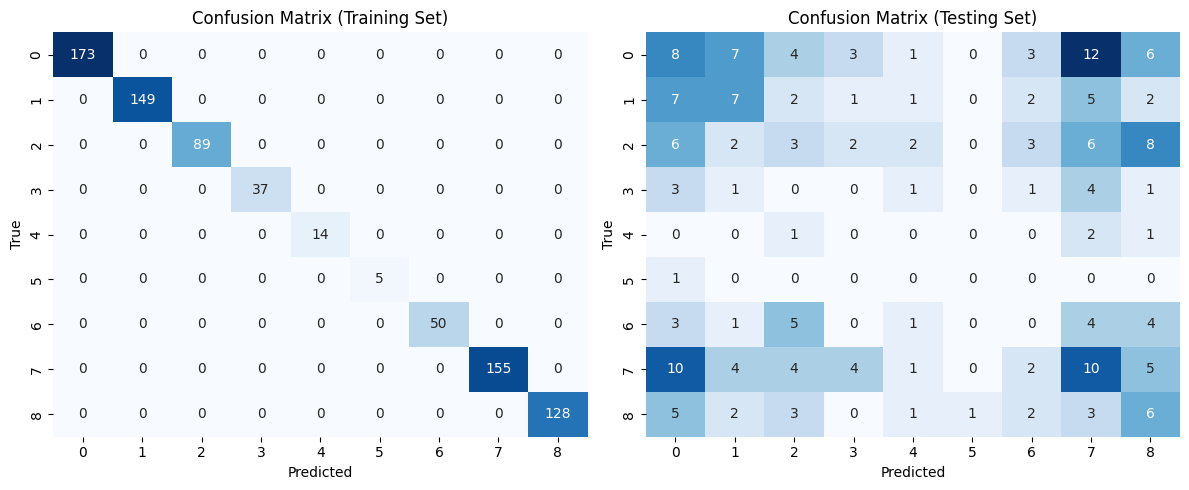

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# 生成目标标签，这里假设有1000个样本
y = df_1000['mapped_religion_num']
df_1000_combined.columns = df_1000_combined.columns.astype(str)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(df_1000_combined, y, test_size=0.2, random_state=42)

# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier()

# 训练决策树模型
dt_classifier.fit(X_train, y_train)

# 预测训练集和测试集
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

# 评估性能
print("Decision Tree Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train_dt))

print("Decision Tree Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_dt))

# 可视化混淆矩阵
cm_dt_train = confusion_matrix(y_train, y_pred_train_dt)
cm_dt_test = confusion_matrix(y_test, y_pred_test_dt)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to calculate AUC without plotting ROC curve
def calculate_auc(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    return roc_auc

# 计算测试集上的概率
y_prob_train_rf = dt_classifier.predict_proba(X_train)[:, 1]
y_prob_test_rf = dt_classifier.predict_proba(X_test)[:, 1]

# 计算 AUC
auc_train_dt = calculate_auc(y_train, y_prob_train_rf)
auc_test_dt = calculate_auc(y_test, y_prob_test_rf)

print("AUC (Decision Tree - Training Set):", auc_train_dt)
print("AUC (Decision Tree - Testing Set):", auc_test_dt)


AUC (Decision Tree - Training Set): 1.0
AUC (Decision Tree - Testing Set): 0.580496681652751


In [ ]:
df_new_combined.columns = df_new_combined.columns.astype(str)

new_pred_test = dt_classifier.predict(df_new_combined)
print(new_pred_test)

[7 7 2 6 8 7 0 8 8 8 6 0 3 7 0 2 6 3 1 8 6 7 8 7 0 4 7 8 7 0 8 7 1 6 1 2 1
 7 7 7 1 3 7 7 1 6 7]


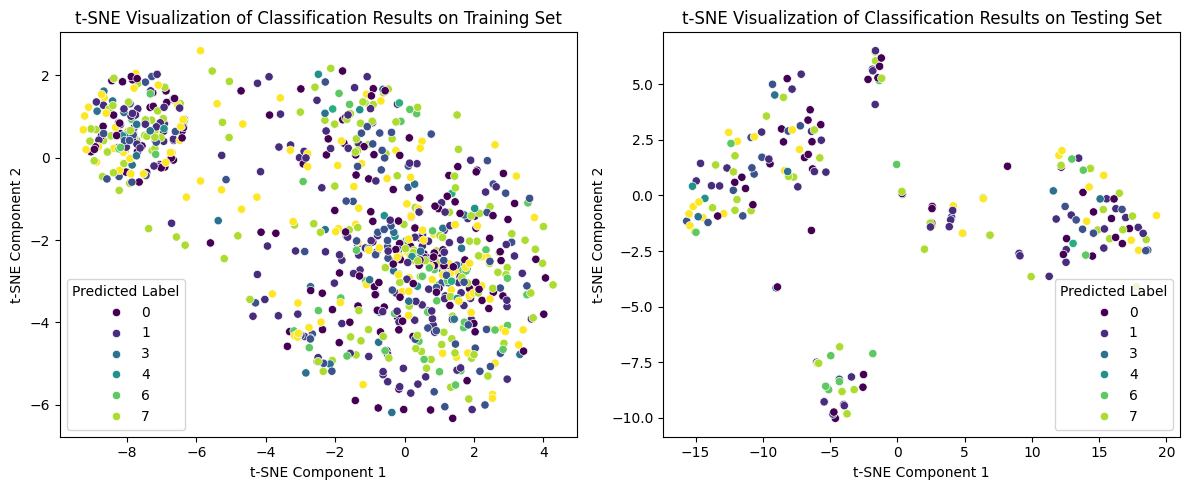

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# 在训练集上的分类结果可视化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_pred_train_dt, palette='viridis')
plt.title('t-SNE Visualization of Classification Results on Training Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Predicted Label')

# 使用 t-SNE 进行降维
X_test_tsne = tsne.fit_transform(X_test)

# 在测试集上的分类结果可视化
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=y_pred_test_dt, palette='viridis')
plt.title('t-SNE Visualization of Classification Results on Testing Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Predicted Label')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练随机森林模型
rf_classifier.fit(df_1000_combined, y)

# 预测训练集和测试集
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# 评估性能
print("Random Forest Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train_rf))

print("Random Forest Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_rf))


Random Forest Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00        89
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00       155
           8       1.00      1.00      1.00       128

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Random Forest Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        27
           2       1.00      

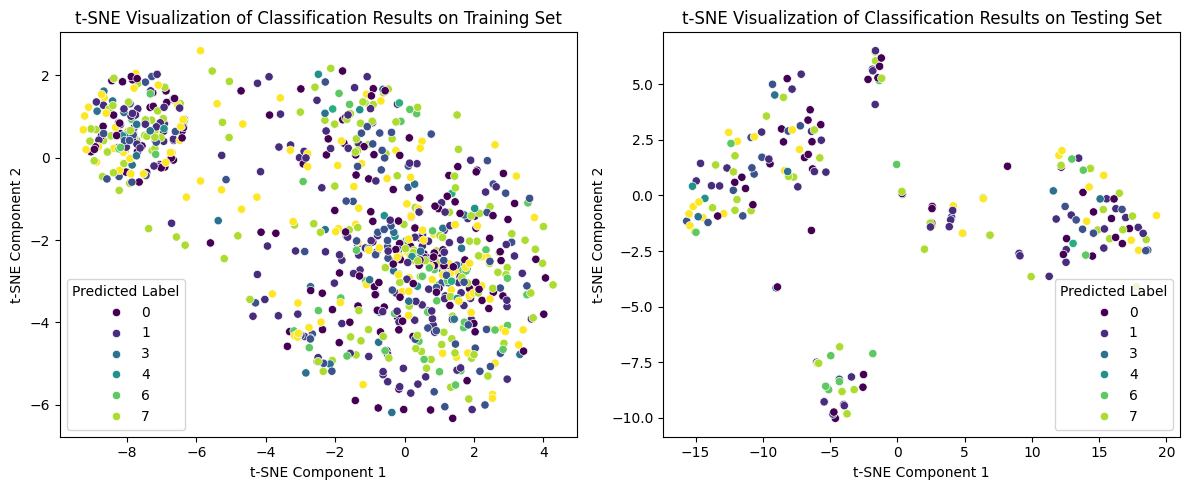

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# 使用 t-SNE 进行降维
#tsne = TSNE(n_components=2, random_state=42)
# X_train_tsne = tsne.fit_transform(X_train)

# 在训练集上的分类结果可视化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_pred_train_dt, palette='viridis')
plt.title('t-SNE Visualization of Classification Results on Training Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Predicted Label')

# 使用 t-SNE 进行降维
X_test_tsne = tsne.fit_transform(X_test)

# 在测试集上的分类结果可视化
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=y_pred_test_dt, palette='viridis')
plt.title('t-SNE Visualization of Classification Results on Testing Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Predicted Label')

plt.tight_layout()
plt.show()


In [ ]:
print(df_1000_combined.shape)


(1000, 104)


In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to calculate AUC without plotting ROC curve
def calculate_auc(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    return roc_auc

# 计算测试集上的概率
y_prob_train_rf = rf_classifier.predict_proba(X_train)[:, 1]
y_prob_test_rf = rf_classifier.predict_proba(X_test)[:, 1]

# 计算 AUC
auc_train_rf = calculate_auc(y_train, y_prob_train_rf)
auc_test_rf = calculate_auc(y_test, y_prob_test_rf)

print("AUC (Random Forest - Training Set):", auc_train_rf)
print("AUC (Random Forest - Testing Set):", auc_test_rf)


AUC (Random Forest - Training Set): 1.0
AUC (Random Forest - Testing Set): 1.0


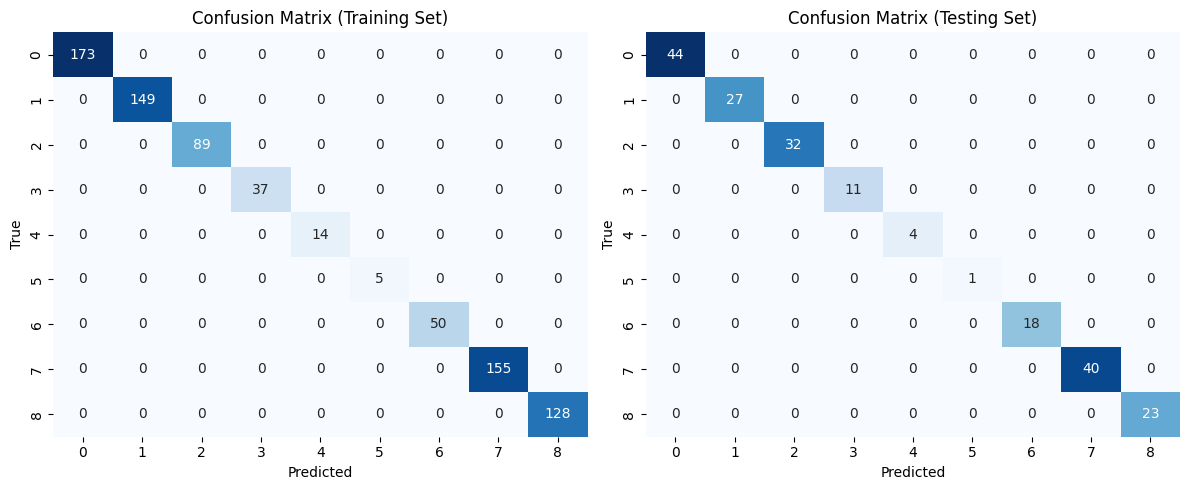

In [ ]:
# 可视化混淆矩阵
cm_dt_train = confusion_matrix(y_train, y_pred_train_rf)
cm_dt_test = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
df_new_combined.columns = df_new_combined.columns.astype(str)

new_pred_test = rf_classifier.predict(df_new_combined)
print(new_pred_test)

[0 1 2 6 0 7 8 1 8 8 0 1 8 0 7 8 1 7 6 8 1 0 7 8 1 8 1 2 8 0 0 7 1 1 1 0 7
 7 0 7 0 1 7 7 0 7 7]


Here we can see that the Random Forest perform much much better than decision tree. It make sense because random forest consist of many decision trees. The assemble learning can make the predictions more accurate. And it can also aviod overfitting problem since it has a "voting system".

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df_1000['mapped_religion_num']
X_train, X_test, y_train, y_test = train_test_split(df_1000_combined, y, test_size=0.2, random_state=42)
# Assuming X_train, X_test, y_train, y_test are your training and testing sets
# Step 3: Train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=4)  # You can adjust the value of n_neighbors
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=4)

In [ ]:
X_test_reset = X_test.reset_index(drop=True)
X_train_reset = X_train.reset_index(drop=True)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,sex_num,smokes_num,drugs_num,orientation_num
29,0.018315,-0.020123,-0.017474,-0.011760,-0.047977,-0.114662,0.007563,0.116284,-0.039420,-0.086818,...,0.025149,0.032354,0.006295,-0.066655,-0.000576,0.009571,0,3,1,0
535,-0.006836,0.118043,0.020673,-0.023997,-0.070898,-0.217233,-0.107730,0.209438,-0.089777,-0.151828,...,0.132025,0.057301,-0.025234,-0.109979,0.007281,0.045947,0,3,1,0
695,0.000676,0.080684,0.010795,-0.024964,-0.078413,-0.257632,-0.105215,0.240539,-0.112241,-0.196923,...,0.132698,0.043030,-0.010366,-0.125013,0.018688,0.051365,0,0,0,0
557,-0.008999,0.196000,0.026840,-0.002008,-0.034391,-0.217324,-0.111027,0.268074,-0.076469,-0.187102,...,0.250111,0.129322,0.003223,-0.151216,0.051749,0.059037,1,0,0,0
836,0.000668,-0.004755,0.010355,-0.015495,-0.039451,-0.082955,-0.017136,0.052189,-0.034136,-0.050513,...,0.005589,-0.001217,-0.006577,-0.033238,-0.014065,0.017225,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.013391,0.189108,0.034799,0.006961,-0.064575,-0.336963,-0.171935,0.373224,-0.149923,-0.218325,...,0.259870,0.123359,-0.033940,-0.157593,0.048429,0.099534,1,0,0,0
270,0.001134,0.010274,-0.021814,0.013220,-0.006564,-0.073904,-0.006209,0.098459,-0.033772,-0.024468,...,0.031253,0.026051,-0.012345,-0.007505,0.016281,0.023674,1,0,0,2
860,0.014145,0.107746,0.030817,-0.015921,-0.103368,-0.281150,-0.105729,0.257908,-0.123529,-0.208608,...,0.151613,0.070878,-0.021787,-0.165299,0.001525,0.054645,0,2,1,2
435,0.022324,0.074169,-0.000501,-0.027731,-0.053210,-0.191754,-0.049637,0.208839,-0.059774,-0.156965,...,0.124767,0.069083,0.017417,-0.139697,0.018344,0.025587,1,1,1,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Reset index for both X_train and X_test
# X_train_reset = X_train.reset_index(drop=True)
# X_test_reset = X_test.reset_index(drop=True)

# Reset index for y_test
y_test_reset = y_test.reset_index(drop=True)

# Train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train_reset, y_train)


# Predict and Evaluate
y_pred_knn = knn_classifier.predict(X_test)

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test_reset, y_pred_knn))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.75      0.34        44
           1       0.23      0.11      0.15        27
           2       0.24      0.16      0.19        32
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        18
           7       0.18      0.05      0.08        40
           8       0.00      0.00      0.00        23

    accuracy                           0.21       200
   macro avg       0.10      0.12      0.08       200
weighted avg       0.15      0.21      0.14       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


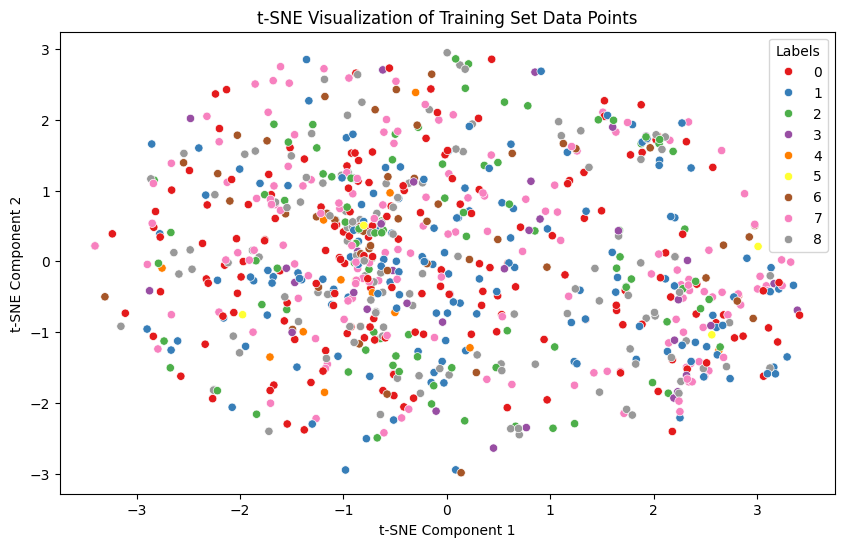

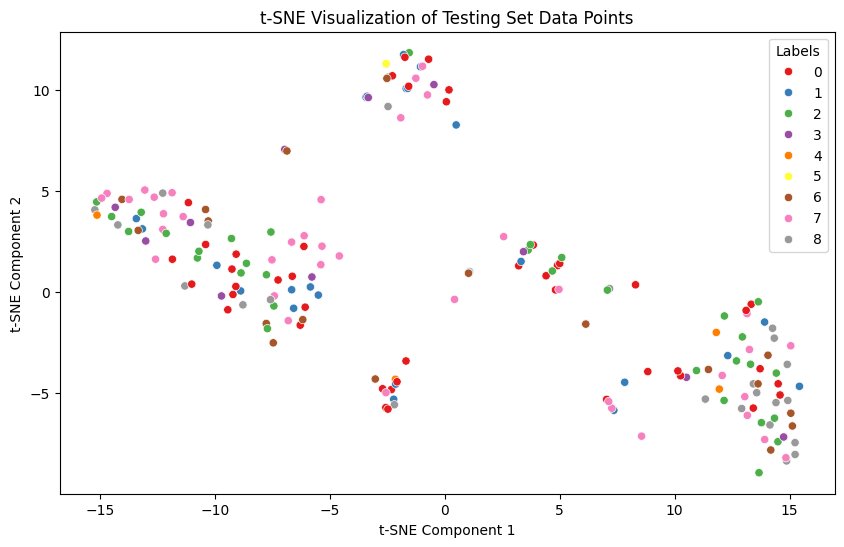

In [ ]:
from sklearn.manifold import TSNE

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Assuming X_train_reset and X_test_reset are your reset training and testing sets

# Assuming y_train_reset and y_test_reset are your reset y_train and y_test

# Fit t-SNE model on the training set
tsne_train = TSNE(n_components=2, random_state=42)
X_train_embedded = tsne_train.fit_transform(X_train_reset)
# Visualize training set data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_embedded[:, 0], y=X_train_embedded[:, 1], hue=y_train, palette='Set1', legend='full')
plt.title('t-SNE Visualization of Training Set Data Points')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Labels')
plt.show()

# Fit t-SNE model on the testing set
tsne_test = TSNE(n_components=2, random_state=42)
X_test_embedded = tsne_test.fit_transform(X_test_reset)

# Visualize testing set data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_embedded[:, 0], y=X_test_embedded[:, 1], hue=y_test, palette='Set1', legend='full')
plt.title('t-SNE Visualization of Testing Set Data Points')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Labels')
plt.show()

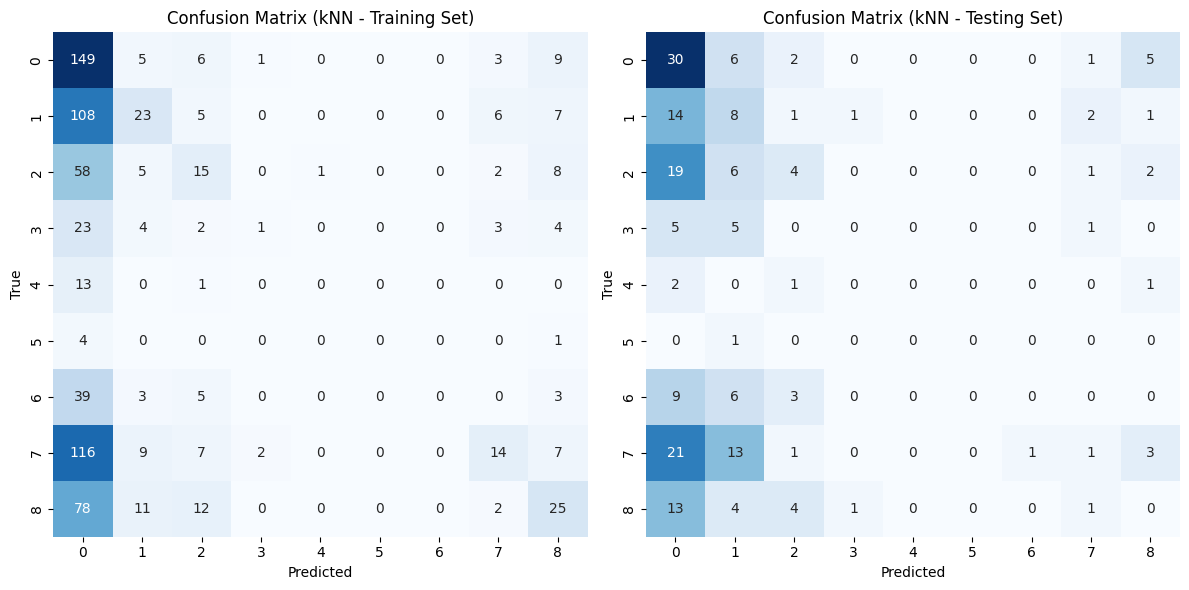

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your kNN model (knn_classifier) on X_train and y_train
y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)


# Calculate confusion matrices for training and testing sets
cm_knn_train = confusion_matrix(y_train, y_pred_train_knn)
cm_knn_test = confusion_matrix(y_test, y_pred_test_knn)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (kNN - Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_knn_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (kNN - Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
# Assuming you have trained KNN classifier as knn_classifier

# Predict probabilities on training set
y_prob_train = knn_classifier.predict_proba(X_train)

# Convert labels to binary format
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

# Calculate AUC for training set
roc_auc_train = roc_auc_score(y_train_bin, y_prob_train, multi_class='ovr')
print("Train AUC:", roc_auc_train)

# Predict probabilities on testing set
y_prob_test = knn_classifier.predict_proba(X_test)

# Convert labels to binary format for testing set
y_test_bin = lb.transform(y_test)

# Calculate AUC for testing set
roc_auc_test = roc_auc_score(y_test_bin, y_prob_test, multi_class='ovr')
print("Test AUC:", roc_auc_test)


Train AUC: 0.5372884473358981
Test AUC: 0.4786782929047817


In [ ]:
# 将合并后的数据框的列名都转换为字符串类型
# Now lets explore the uncoded data.

# 将 'doc2vec_merged_vector' 列的数组连接成一个单一数组
flattened_data = np.concatenate(df_new['doc2vec_merged_vector'].values)

# 将数组转换为 NumPy 数组，并确保数据类型是浮点数
numeric_data = np.array(flattened_data, dtype=np.float32)

# 确保 numeric_data 的形状正确
numeric_data = numeric_data.reshape(-1, len(df_new['doc2vec_merged_vector'].values[0]))

# 将 numeric_data 存储在新列 'numeric_doc2vec_merged_vector' 中
df_new['numeric_doc2vec_merged_vector'] = numeric_data.tolist()

# 假设 'numeric_doc2vec_merged_vector' 是包含列表的列
numeric_data = pd.DataFrame(df_new['numeric_doc2vec_merged_vector'].tolist())

selected_columns = ['sex_num', 'smokes_num', 'drugs_num','orientation_num']

# 从 df_new 中提取特定列
selected_data = df_new[selected_columns]

# 使用 merge 合并（不重置索引）
df_new_combined = pd.merge(numeric_data, selected_data, left_index=True, right_index=True)

# 删除na
df_new_combined.dropna()

df_new_combined.columns = df_new_combined.columns.astype(str)

new_pred_test = knn_classifier.predict(df_new_combined)
print(new_pred_test)

[1 0 0 2 0 2 7 0 2 0 0 0 0 1 2 0 2 0 0 0 2 7 0 0 0 2 0 1 0 0 0 2 1 0 0 0 0
 1 0 1 1 0 2 2 1 0 0]


Here we can see that the KNN does not perform very well. The reason is similar to logistic regression. There may be no enough imformation!

As for KNN and K-mean:

K-nearest neighbor (k-NN) and k-means clustering are two distinct machine learning techniques with some conceptual similarities. Both methods use a parameter 'k', but in different contexts: in k-NN, 'k' denotes the number of nearest neighbors considered for predictions, while in k-means, it represents the number of clusters. Both approaches rely on a neighborhood concept: in k-NN, predictions are based on the class labels of nearest neighbors, while in k-means, data points are assigned to clusters based on proximity to cluster centroids. However, they differ in terms of learning type; k-NN is supervised, requiring labeled data for prediction, while k-means is unsupervised, partitioning data into clusters based on similarity. Additionally, k-NN is primarily used for classification tasks, whereas k-means is utilized for clustering. Both methods employ distance metrics to assess similarity between data points, with k-NN commonly using Euclidean or Manhattan distance, and k-means often relying on Euclidean distance for cluster assignments.






## <font color="red">*Exercise 6*</font> :)

<font color="red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, logistic and decision-tree approaches?

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(df_1000_combined, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # Assuming you have 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate on the test set
y_pred_nn_prob = model.predict(X_test_scaled)

# Get the predicted classes
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1)

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Epoch 1/10
20/20 [==============================] - 4s 22ms/step - loss: 2.1169 - accuracy: 0.1688 - val_loss: 2.0147 - val_accuracy: 0.2438
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 1.8901 - accuracy: 0.2688 - val_loss: 1.9449 - val_accuracy: 0.2062
Epoch 3/10
20/20 [==============================] - 0s 11ms/step - loss: 1.8255 - accuracy: 0.2906 - val_loss: 1.9333 - val_accuracy: 0.2438
Epoch 4/10
20/20 [==============================] - 0s 13ms/step - loss: 1.7867 - accuracy: 0.2969 - val_loss: 1.9550 - val_accuracy: 0.2062
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 1.7583 - accuracy: 0.3109 - val_loss: 1.9554 - val_accuracy: 0.1688
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 1.7273 - accuracy: 0.3422 - val_loss: 1.9648 - val_accuracy: 0.2313
Epoch 7/10
20/20 [==============================] - 0s 11ms/step - loss: 1.6921 - accuracy: 0.3703 - val_loss: 1.9655 - val_accuracy: 0.2500
Epoch 8/10
20/20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 4ms/step


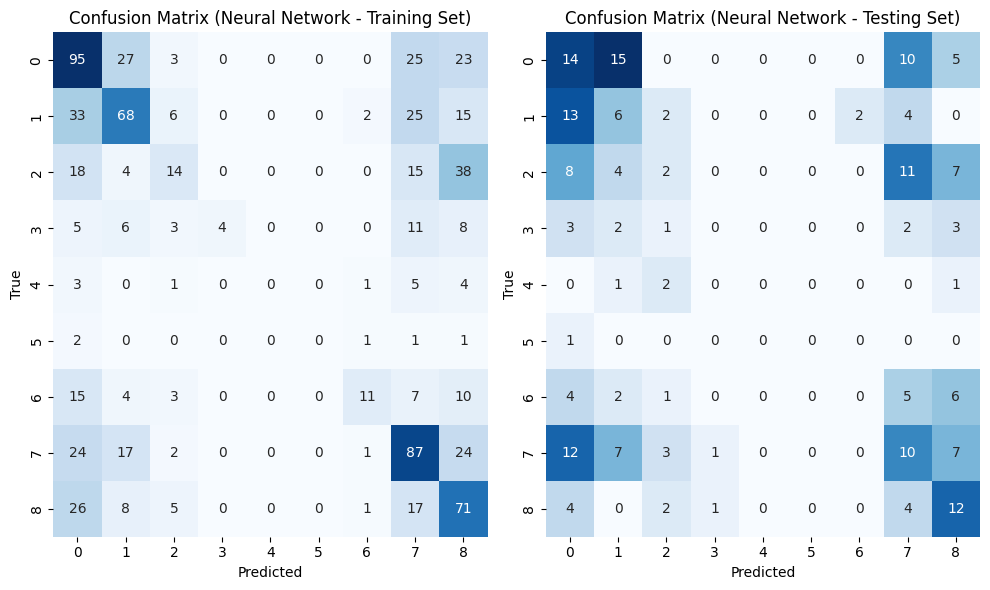

In [ ]:
# Evaluate on the training set
y_pred_prob_nn_train = model.predict(X_train_scaled)

# Get the predicted class labels for training set
y_pred_nn_train = np.argmax(y_pred_prob_nn_train, axis=1)

# Evaluate on the test set
y_pred_prob_nn_test = model.predict(X_test_scaled)

# Get the predicted class labels for training set
y_pred_nn_test = np.argmax(y_pred_prob_nn_test, axis=1)

# Plot confusion matrix for training set
cm_nn_train = confusion_matrix(y_train, y_pred_nn_train)

# Plot confusion matrix for testing set
cm_nn = confusion_matrix(y_test, y_pred_nn_test)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_nn_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Neural Network - Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Neural Network - Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Convert labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_train_bin = lb.fit_transform(y_train)

# Predict probabilities using the model
y_prob_nn = model.predict(X_test_scaled)
y_prob_nn_train = model.predict(X_train_scaled)

# Calculate overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob_nn.ravel())
roc_auc = roc_auc_score(y_test_bin, y_prob_nn, multi_class='ovr')

# Print overall AUC
print("Test AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_train_bin.ravel(), y_prob_nn_train.ravel())
roc_auc = roc_auc_score(y_train_bin, y_prob_nn_train, multi_class='ovr')

print("Train AUC:", roc_auc)



25/25 [==============================] - 0s 5ms/step
Test AUC: 0.5491125501240056
Train AUC: 0.7568618788582634



Neural networks are powerful for capturing complex patterns in data through interconnected neurons, while k-nearest neighbor focuses on proximity-based classification, logistic regression predicts binary outcomes based on linear relationships, and decision trees partition the feature space based on feature values, offering interpretability but prone to overfitting. Each approach has its strengths and is suitable for different tasks based on factors like data complexity and interpretability requirements.

## <font color="red">*Exercise 7*</font> :)

<font color="red">In the cells immediately following, use the pipeline functions or the word or sentence vector functions (e.g., similarity) to explore the social game underlying the production and meaning of texts associated with your final project. How does BERT help you gain insight regarding your research question that is similar and different from prior methods?

In [ ]:
# The question and answering in the pipeline function is very interesting! Lets try that!


In [ ]:
from transformers import pipeline
import pandas as pd

# Extract text from the 'merged_column' column
texts = df_1000['Merged_Column'][:20].tolist()

# Initialize the question-answering pipeline
nlp = pipeline("question-answering")

# Example question
question = "Do you think they are confident about themselves?"

# Perform question-answering on each text
answers = []
for text in texts:
    result = nlp(question=question, context=text)
    answers.append(result['answer'])

# Display the DataFrame with the added answers
print(answers)


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


['you love to have really serious, really deep conversations about really silly stuff', 'i am a very confident and friendly', 'approachable', 'good at finding creative solutions to problems', "i don't come off like anyone else", 'nan', 'my job is super stressful and challenging', 'burritos i like thinking about ways to improve things', "i'm pretty direct", 'motivated', 'mostly my plan is to be happy with whatever i do', 'pretty thorough when motivated', 'beyond my control', 'othere stuf', 'not as good', 'laid back guy that likes to just have fun', 'friends family', "they're very green", 'passionate', 'no-doubt']


Well????? It seems that the answer does not quite match the question?

In [ ]:
import pandas as pd
from transformers import pipeline, AutoModelForQuestionAnswering, AutoTokenizer
# Extract text from the 'merged_column' column
texts = df_1000['Merged_Column'][:20].tolist()
# Load the question-answering model and tokenizer
model_name = "distilbert-base-cased-distilled-squad"  # You can use other question-answering models

model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Initialize the question-answering pipeline
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)

# Example question
question = "Do you think they are confident about themselves?"

# Perform question-answering on each text
answers = []
for text in texts:
    result = nlp(question=question, context=text)
    answers.append(result['answer'])

# Display the DataFrame with the added answers
print(answers)

['you love to have really serious, really deep conversations about really silly stuff', 'i am a very confident and friendly', 'approachable', 'good at finding creative solutions to problems', "i don't come off like anyone else", 'nan', 'my job is super stressful and challenging', 'burritos i like thinking about ways to improve things', "i'm pretty direct", 'motivated', 'mostly my plan is to be happy with whatever i do', 'pretty thorough when motivated', 'beyond my control', 'othere stuf', 'not as good', 'laid back guy that likes to just have fun', 'friends family', "they're very green", 'passionate', 'no-doubt']


Well. Appearently all wired answers. But further dicoveries on this models may be interesting. But at least our attempt do shows that we need to think carefully about our questions to aviod getting wired answers.

Neverthless, BERT do shows a lot flexibility. After tuning the models we can use them to extract more interesting characteristics of the texts other than "already labled data".

In [40]:
!jupyter nbconvert --to html *.ipynb

[NbConvertApp] Converting notebook 4_Word_Embeddings.ipynb to html
[NbConvertApp] Writing 14164794 bytes to 4_Word_Embeddings.html
[NbConvertApp] Converting notebook 5-Classifying-Meanings-and-Documents.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_s